<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 71.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826041 sha256=fe8fc02c5e6c8bb585b2fe5d3f86482db4d0279b9c26c549646952e951894571
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436294 sha256=e8972bad2332f7dca48f611fd90d37089a51d11d4335cbf027307861726b4672
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [50]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute15", count=398)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-04-12 22:00:00  40141000.0  40281000.0  40030000.0  40258000.0   
2023-04-12 22:15:00  40258000.0  40347000.0  40153000.0  40176000.0   
2023-04-12 22:30:00  40176000.0  40298000.0  40100000.0  40118000.0   
2023-04-12 22:45:00  40119000.0  40144000.0  39946000.0  40100000.0   
2023-04-12 23:00:00  40121000.0  40230000.0  40070000.0  40073000.0   
...                         ...         ...         ...         ...   
2023-04-18 14:15:00  38760000.0  38816000.0  38750000.0  38812000.0   
2023-04-18 14:30:00  38812000.0  38815000.0  38770000.0  38792000.0   
2023-04-18 14:45:00  38800000.0  38822000.0  38778000.0  38778000.0   
2023-04-18 15:00:00  38780000.0  38838000.0  38778000.0  38829000.0   
2023-04-18 15:15:00  38829000.0  39013000.0  38827000.0  38963000.0   

                         volume         value  
2023-04-12 22:00:00  170.324245  6.842040e+09  
2023-04-12 22:15:00  133.994985  5.392552e+09  
202

In [51]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-12 22:00:00,40258000.0
1,2023-04-12 22:15:00,40176000.0
2,2023-04-12 22:30:00,40118000.0
3,2023-04-12 22:45:00,40100000.0
4,2023-04-12 23:00:00,40073000.0
...,...,...
545,2023-04-18 14:15:00,38812000.0
546,2023-04-18 14:30:00,38792000.0
547,2023-04-18 14:45:00,38778000.0
548,2023-04-18 15:00:00,38829000.0


In [52]:
#prophet 불러옴
from fbprophet import Prophet

In [53]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [54]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


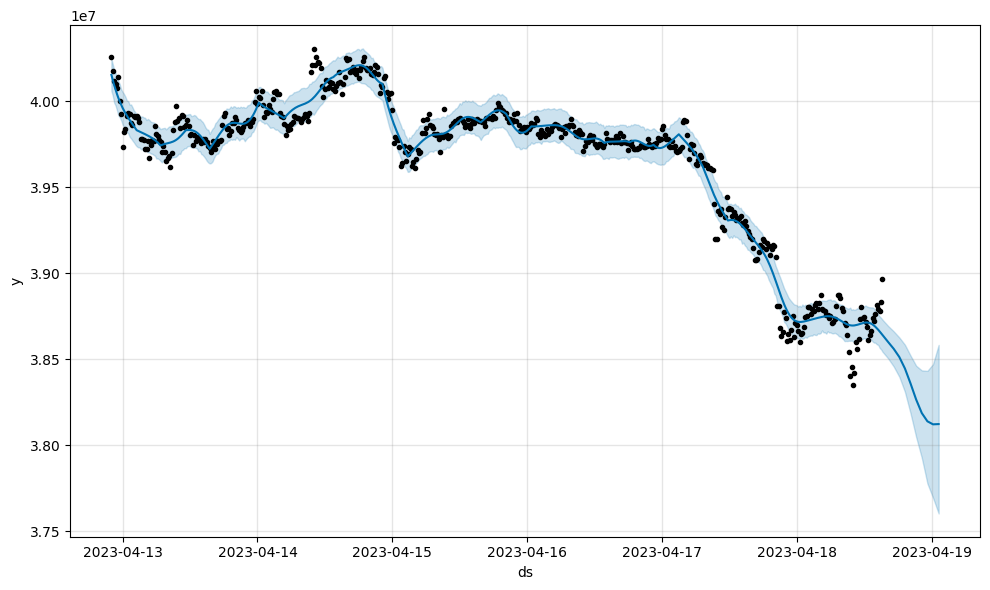

In [55]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


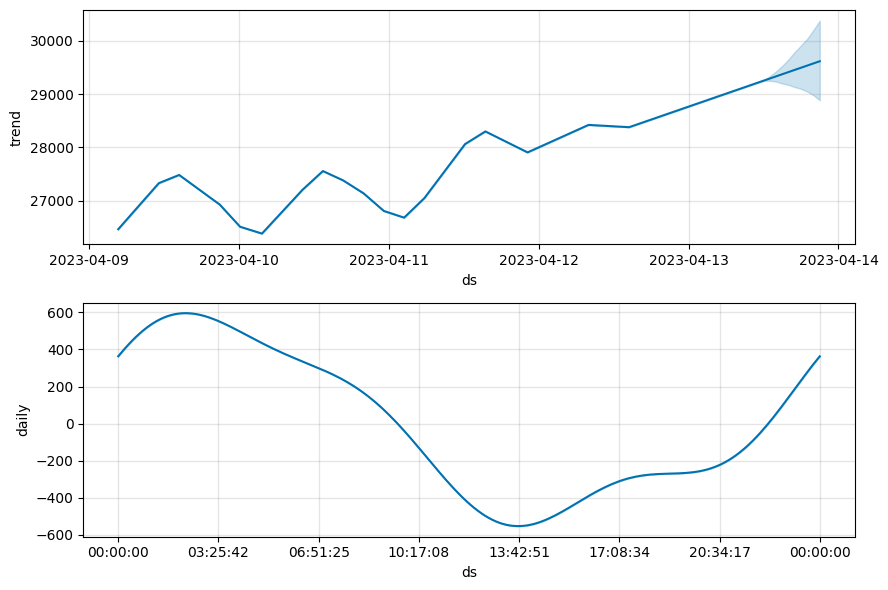

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored